In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-S8TORHP;"
                     "Database=dataset1;"
                     "Trusted_Connection=yes;")

# rynning the SQL quey i need
SQL_Query = pd.read_sql_query('''SELECT Fructose, Glucose, Maltose, Turanose, "Mélibiose+ Isomaltose", Saccharose, Tréhalose, Gentibiose,Palatinose, Raffinose, Erlose, Mélézitose, Maltotriose, Panose, Isomaltotriose FROM [dataset1].[dbo].[Sheet01]''', conn2)

#conn.close()



# Viz
SQL_Query.head()

C:\Users\abbel\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose
0,38.45,33.48,5.09,1.63,0.29,0.43,0.0,0.00,0.0,0.0,1.72,0.03,0.10,0.0,0.0
1,40.30,31.95,4.49,1.43,0.32,0.18,0.0,0.00,0.0,0.0,0.53,0.04,0.05,0.0,0.0
2,38.80,34.46,4.00,1.42,0.28,0.20,0.0,0.00,0.0,0.0,1.32,0.04,0.38,0.0,0.0
3,37.89,32.56,5.34,1.74,0.56,0.50,0.0,0.14,0.0,0.0,1.71,0.06,0.15,0.0,0.0
4,37.16,33.91,5.12,1.65,0.45,0.45,0.0,0.00,0.0,0.0,1.36,0.06,0.13,0.0,0.0


In [2]:
SQL_Query.shape

(34, 15)

In [3]:
SQL_Query.columns

Index(['Fructose', 'Glucose', 'Maltose', 'Turanose', 'Mélibiose+ Isomaltose',
       'Saccharose', 'Tréhalose', 'Gentibiose', 'Palatinose', 'Raffinose',
       'Erlose', 'Mélézitose', 'Maltotriose', 'Panose', 'Isomaltotriose'],
      dtype='object')

In [4]:
df = SQL_Query.iloc[:, 0:14].values

In [5]:
df

array([[3.845e+01, 3.348e+01, 5.090e+00, 1.630e+00, 2.900e-01, 4.300e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.720e+00, 3.000e-02,
        1.000e-01, 0.000e+00],
       [4.030e+01, 3.195e+01, 4.490e+00, 1.430e+00, 3.200e-01, 1.800e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.300e-01, 4.000e-02,
        5.000e-02, 0.000e+00],
       [3.880e+01, 3.446e+01, 4.000e+00, 1.420e+00, 2.800e-01, 2.000e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.320e+00, 4.000e-02,
        3.800e-01, 0.000e+00],
       [3.789e+01, 3.256e+01, 5.340e+00, 1.740e+00, 5.600e-01, 5.000e-01,
        0.000e+00, 1.400e-01, 0.000e+00, 0.000e+00, 1.710e+00, 6.000e-02,
        1.500e-01, 0.000e+00],
       [3.716e+01, 3.391e+01, 5.120e+00, 1.650e+00, 4.500e-01, 4.500e-01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.360e+00, 6.000e-02,
        1.300e-01, 0.000e+00],
       [3.875e+01, 3.495e+01, 4.510e+00, 1.450e+00, 2.500e-01, 5.300e-01,
        0.000e+00, 0.000e+00, 0

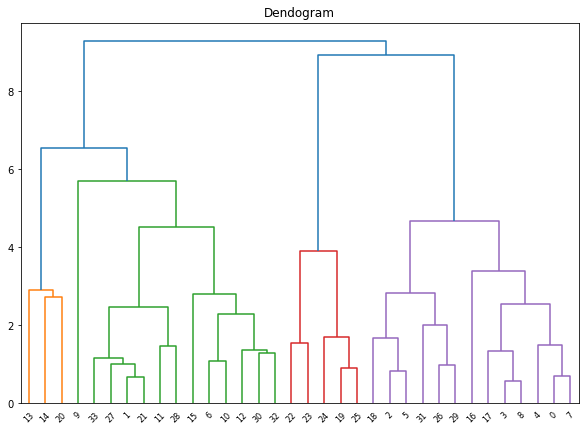

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(df)

In [8]:
labels_

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [9]:
SQL_Query['labels'] = cluster.labels_

In [11]:
SQL_Query.head()

,Fructose,Glucose,Maltose,Turanose,Mélibiose+ Isomaltose,Saccharose,Tréhalose,Gentibiose,Palatinose,Raffinose,Erlose,Mélézitose,Maltotriose,Panose,Isomaltotriose,labels
0,38.45,33.48,5.09,1.63,0.29,0.43,0.0,0.00,0.0,0.0,1.72,0.03,0.10,0.0,0.0,0
1,40.30,31.95,4.49,1.43,0.32,0.18,0.0,0.00,0.0,0.0,0.53,0.04,0.05,0.0,0.0,1
2,38.80,34.46,4.00,1.42,0.28,0.20,0.0,0.00,0.0,0.0,1.32,0.04,0.38,0.0,0.0,0
3,37.89,32.56,5.34,1.74,0.56,0.50,0.0,0.14,0.0,0.0,1.71,0.06,0.15,0.0,0.0,0
4,37.16,33.91,5.12,1.65,0.45,0.45,0.0,0.00,0.0,0.0,1.36,0.06,0.13,0.0,0.0,0


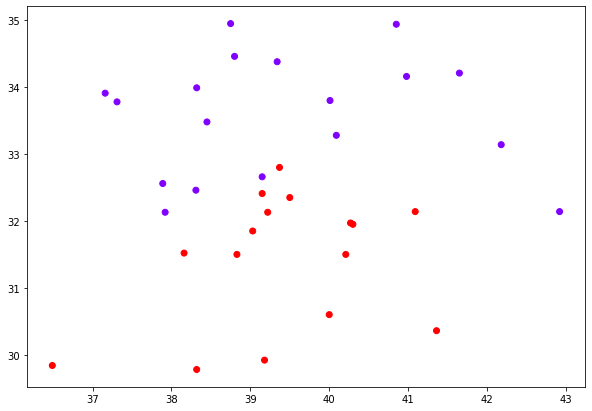

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')

In [14]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-S8TORHP;"
                     "Database=dataset1;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

SQL_Query.to_sql('dataset_clusters_hierarchical', schema='dbo', con = engine, if_exists = 'replace')

-1